# DA Final project: Sleep Efficiency

# Group 

# Going Of The Rails

###  Name of students:
Roy Ashkenazi<br>
Zohar Kulp<br>
Oz Kenner<br>



<a id='top'></a>

<div>
<img src="https://github.com/RoidoAsh/project1/blob/main/sleep-share-card.jpeg?raw=true" width="800"/>
</div>


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date
import matplotlib as mpl
import plotly.graph_objects as go

In [2]:
url = 'https://raw.githubusercontent.com/ZoeyKulp/Project/main/Sleep_Efficiency.csv'
Sleep_Efficiency = pd.read_csv(url)
Sleep_Efficiency.shape

(452, 15)

In [3]:
Sleep_Efficiency.head()

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,1,65,Female,06/03/2021 01:00,06/03/2021 07:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0
1,2,69,Male,05/12/2021 02:00,05/12/2021 09:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0
2,3,40,Female,25/05/2021 21:30,25/05/2021 05:30,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,4,40,Female,03/11/2021 02:30,03/11/2021 08:30,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0
4,5,57,Male,13/03/2021 01:00,13/03/2021 09:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0


In [4]:
Sleep_Efficiency['Smoke_stat_by_num'] = Sleep_Efficiency['Smoking status'].apply(lambda x: 1 if x == 'Yes' else 0)
Sleep_Efficiency['Bedtime'] = pd.to_datetime(Sleep_Efficiency['Bedtime'], format='%d/%m/%Y %H:%M')
Sleep_Efficiency['Wakeup time'] = pd.to_datetime(Sleep_Efficiency['Wakeup time'], format='%d/%m/%Y %H:%M')

In [5]:
#Fill non-finite values with 0 and convert the column to int
Sleep_Efficiency['Exercise frequency'].fillna(0, inplace=True)
Sleep_Efficiency['Exercise frequency'] = Sleep_Efficiency['Exercise frequency'].astype(int)
Sleep_Efficiency.head()

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency,Smoke_stat_by_num
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3,1
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3,1
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3,0
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1,1
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3,0


In [6]:
Sleep_Efficiency.shape

(452, 16)

In [7]:
Sleep_Efficiency.columns

Index(['ID', 'Age', 'Gender', 'Bedtime', 'Wakeup time', 'Sleep duration',
       'Sleep efficiency', 'REM sleep percentage', 'Deep sleep percentage',
       'Light sleep percentage', 'Awakenings', 'Caffeine consumption',
       'Alcohol consumption', 'Smoking status', 'Exercise frequency',
       'Smoke_stat_by_num'],
      dtype='object')

In [8]:
Sleep_Efficiency.dtypes

ID                                 int64
Age                                int64
Gender                            object
Bedtime                   datetime64[ns]
Wakeup time               datetime64[ns]
Sleep duration                   float64
Sleep efficiency                 float64
REM sleep percentage               int64
Deep sleep percentage              int64
Light sleep percentage             int64
Awakenings                       float64
Caffeine consumption             float64
Alcohol consumption              float64
Smoking status                    object
Exercise frequency                 int32
Smoke_stat_by_num                  int64
dtype: object

In [9]:
Sleep_Efficiency.isnull().sum().sort_values()

ID                         0
Age                        0
Gender                     0
Bedtime                    0
Wakeup time                0
Sleep duration             0
Sleep efficiency           0
REM sleep percentage       0
Deep sleep percentage      0
Light sleep percentage     0
Smoking status             0
Exercise frequency         0
Smoke_stat_by_num          0
Alcohol consumption       14
Awakenings                20
Caffeine consumption      25
dtype: int64

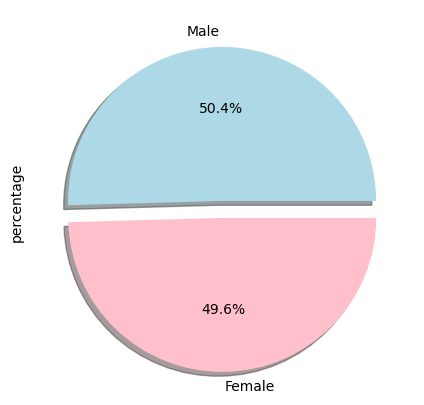

In [10]:
plt.figure(figsize=(15,5))
Sleep_Efficiency['Gender'].value_counts().plot.pie(autopct='%1.1f%%', shadow = True, explode = (0.01, 0.1), colors = ['lightblue', 'pink'])
plt.ylabel('percentage')
plt.show()

## <span style="color:blue"> Conclusion 1: The effect of alcohol on our four stages of sleep, according to men and women </span>


In [11]:
Sleep_Efficiency.groupby('Gender')['Sleep duration'].mean().reset_index()

,Gender,Sleep duration
0,Female,7.504464
1,Male,7.427632


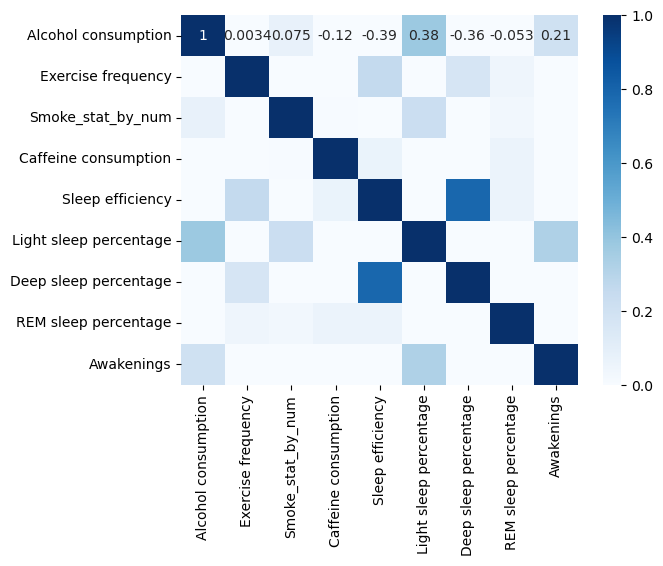

In [12]:
features1 = ['Alcohol consumption','Exercise frequency','Smoke_stat_by_num','Caffeine consumption','Sleep efficiency','Light sleep percentage','Deep sleep percentage','REM sleep percentage','Awakenings']
correlation_matrix = Sleep_Efficiency[features1].corr()
sns.heatmap(correlation_matrix,vmin=0 , vmax = 1,cmap='Blues' , annot=True);

In [13]:
Sleep_Efficiency['Gender'].replace([0, 1], ['Female', 'Male'], inplace=True)

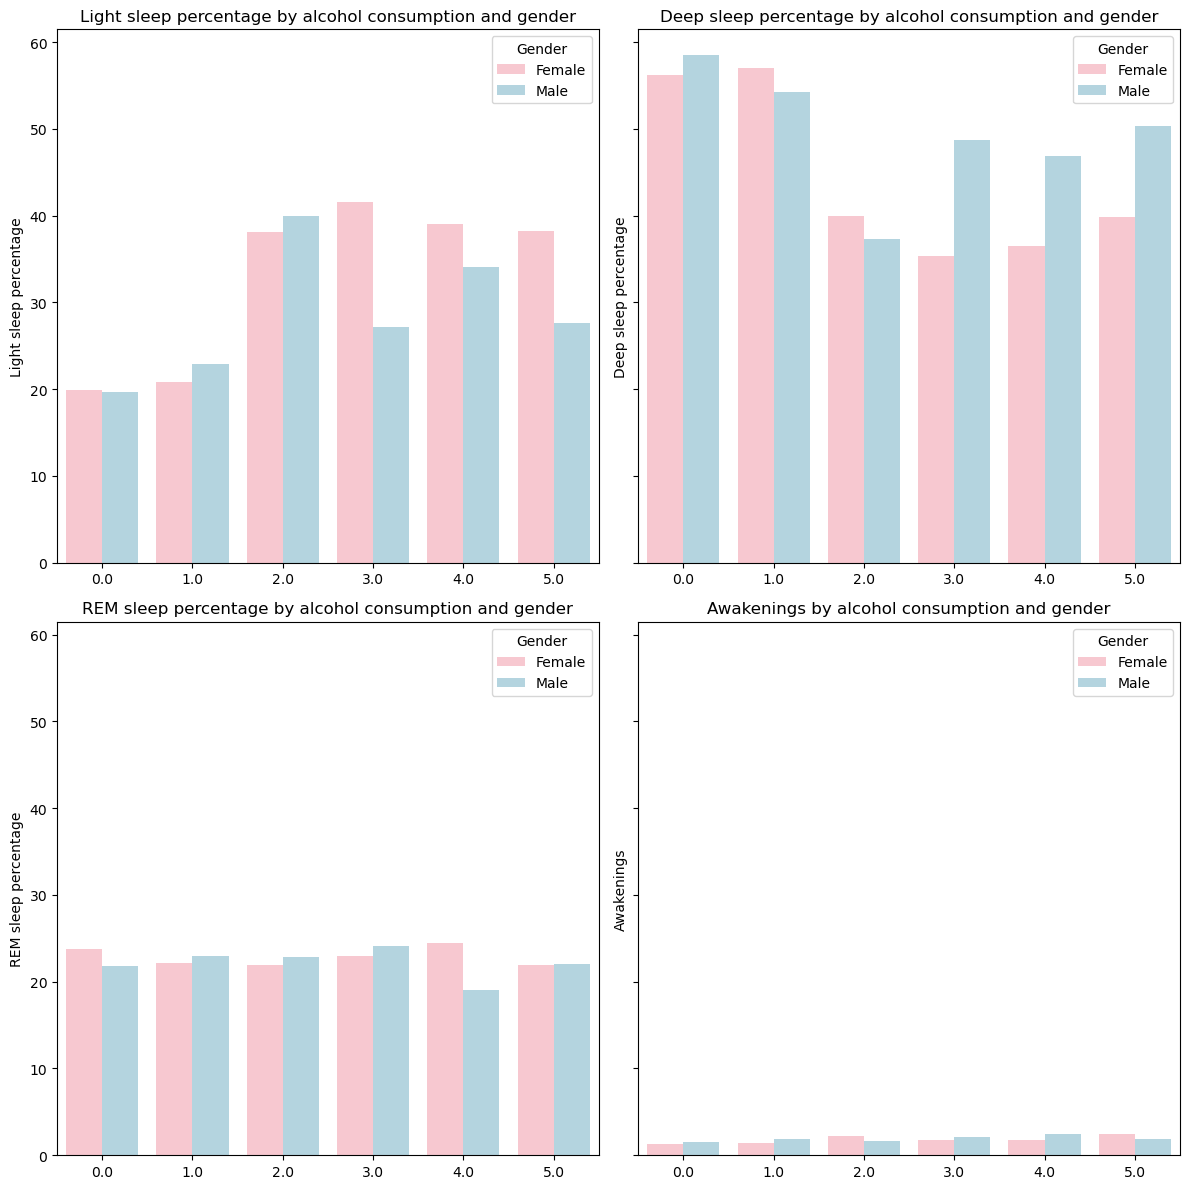

In [14]:
palette = {'Female': 'pink', 'Male': 'lightblue'}
fig, axes = plt.subplots(2, 2, figsize=(12, 12), sharey=True)

sns.barplot(x="Alcohol consumption", y="Light sleep percentage", hue="Gender", palette=palette, errorbar=None, data=Sleep_Efficiency, ax=axes[0, 0])
axes[0, 0].set_title("Light sleep percentage by alcohol consumption and gender")
axes[0, 0].set_xlabel("")
axes[0, 0].set_ylabel("Light sleep percentage")

sns.barplot(x="Alcohol consumption", y="Deep sleep percentage", hue="Gender", palette=palette, errorbar=None, data=Sleep_Efficiency, ax=axes[0, 1])
axes[0, 1].set_title("Deep sleep percentage by alcohol consumption and gender")
axes[0, 1].set_xlabel("")
axes[0, 1].set_ylabel("Deep sleep percentage")

sns.barplot(x="Alcohol consumption", y="REM sleep percentage", hue="Gender", palette=palette, errorbar=None, data=Sleep_Efficiency, ax=axes[1, 0])
axes[1, 0].set_title("REM sleep percentage by alcohol consumption and gender")
axes[1, 0].set_xlabel("")
axes[1, 0].set_ylabel("REM sleep percentage")

sns.barplot(x="Alcohol consumption", y="Awakenings", hue="Gender", palette=palette, errorbar=None, data=Sleep_Efficiency, ax=axes[1, 1])
axes[1, 1].set_title("Awakenings by alcohol consumption and gender")
axes[1, 1].set_xlabel("")
axes[1, 1].set_ylabel("Awakenings")

plt.tight_layout()
plt.show()

In [15]:
filtered_Eff = Sleep_Efficiency[Sleep_Efficiency['Alcohol consumption'] > 3]
average_sleep_quality = filtered_Eff.groupby('Gender')['Sleep efficiency'].mean().reset_index()
average_sleep_quality.columns = ['Gender', 'Average Sleep Quality']
average_sleep_quality

,Gender,Average Sleep Quality
0,Female,0.661250
1,Male,0.712759


אפשר לראות את השפעת אלכוהול על כל אחד משלבי השינה לפי מגדר.   אפשר לראות שנשים שצורכות למעלה מ 90 מ"מ, 24 שעות לפני שעת השינה שלהם ישהו במהלך  זמן השינה הכולל שלהן יותר בשלב השינה הקל מאשר גברים שישהו יותר זמן בשלב השינה העמוקה דבר שמשפיע בסופו של דבר על איכות השינה   

### <span style="color:blue"> Observation 1:</span>
We observe the effects of alcohol consumption on sleep stages according to gender. Our data indicates that women who consume 90 ml of alcohol spend the majority of their sleep in light sleep, whereas men consuming the same amount tend to spend more time in deep sleep.

Regarding the REM sleep stage, there is no significant difference between men and women. According to online research, "Healthy adults should expect to spend about 20-25% of their total time asleep in REM sleep, while infants spend around 50% of their sleep in REM." In our data, both men and women spend about 20-25% of their sleep time in REM sleep, even when consuming alcohol.

What surprised us is that, although men spend most of their sleep in deep sleep, they experience more frequent awakenings during the night compared to women.

## <span style="color:green"> Conclusion 2: Connections between Exercise, smoking status and Sleep efficiency by age groups</span>

we will use a map correlations between the columns we want to dig in too and see if there is connections.

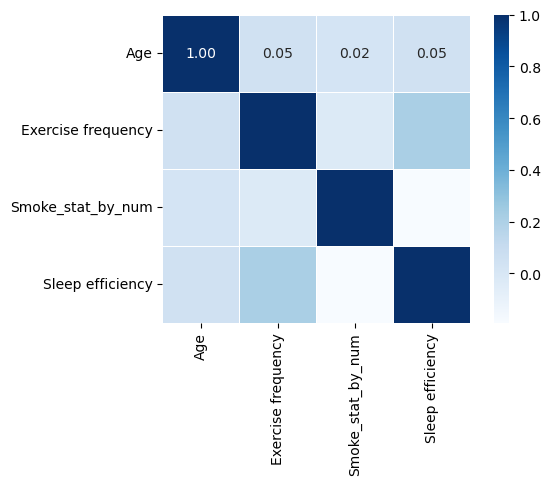

In [16]:
features = ['Age', 'Exercise frequency', 'Smoke_stat_by_num', 'Sleep efficiency']
correlation_matrix = Sleep_Efficiency[features].corr(method='kendall').round(2)
plt.figure(figsize=(6, 4))
sns.heatmap(data=correlation_matrix, annot=True, cmap='Blues', cbar=True, square=True, fmt='.2f', linewidths=0.5)
plt.show()

We will create a 'Age category' column according to our age groups.

Working on Exercise frequency by 'Age category' + whether it improves Sleep efficiency :

In [17]:
bins = [0, 25, 35, 65, float('inf')]
labels = ['0-25', '25-35', '35-65', '65+']

Sleep_Efficiency['Age Category'] = pd.cut(Sleep_Efficiency['Age'], bins=bins, labels=labels, right=False)

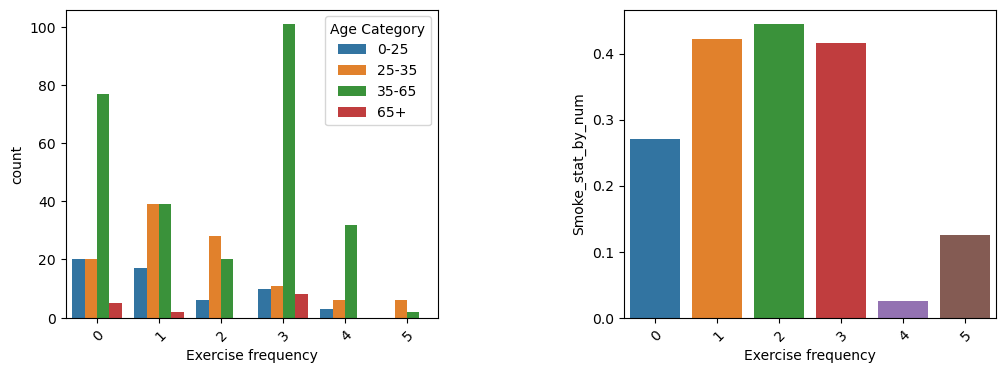

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

sns.countplot(data=Sleep_Efficiency, x='Exercise frequency', hue='Age Category', ax=ax[0])
sns.barplot(data = Sleep_Efficiency, x='Exercise frequency',  y = "Smoke_stat_by_num", errorbar=None, ax = ax[1])  

ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')   

plt.subplots_adjust(wspace=0.5)

ax[0].set_xlabel('Exercise frequency')
ax[1].set_xlabel('Exercise frequency')

ax[0].legend(title='Age Category', loc='upper right')
plt.show()

we can see that in the age group 35-65, exercising three times a week is a common frequency. We will examine whether individuals in this age group who exercise three times a week are smokers and value their sleep efficiency to gain further insights.

In the right graph we can see that the majority of the people who smoke exercise between 1-3 times a week.

In [19]:
exercise_frequency_summary = Sleep_Efficiency.groupby('Age Category', observed=True)['Exercise frequency'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan).reset_index()
exercise_frequency_summary.columns = ['Age Category', 'Most common exercise frequency']

In [20]:
exercise_frequency_summary

,Age Category,Most common exercise frequency
0,0-25,0
1,25-35,1
2,35-65,3
3,65+,3


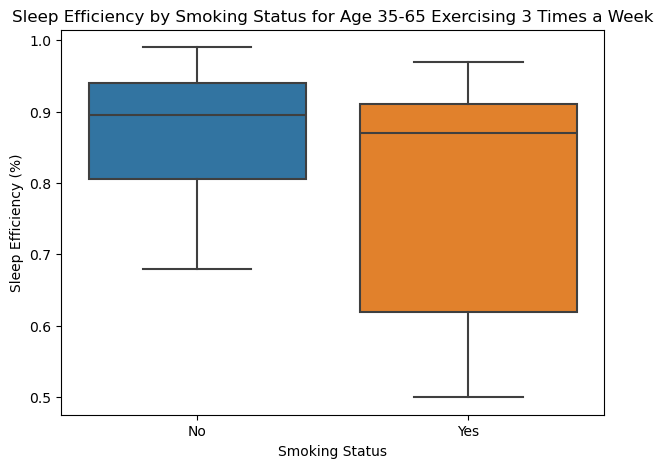

In [21]:
filtered_data = Sleep_Efficiency[(Sleep_Efficiency['Age Category'] == '35-65') & (Sleep_Efficiency['Exercise frequency'] == 3)]
smoking_status_counts = filtered_data['Smoking status'].value_counts()
mean_sleep_efficiency = filtered_data.groupby('Smoking status')['Sleep efficiency'].mean().reset_index()
fig, ax = plt.subplots(1, 1, figsize=(7, 5))
sns.boxplot(data=filtered_data, x='Smoking status', y='Sleep efficiency', ax=ax)
ax.set_title('Sleep Efficiency by Smoking Status for Age 35-65 Exercising 3 Times a Week')
ax.set_xlabel('Smoking Status')
ax.set_ylabel('Sleep Efficiency (%)')
plt.show()

### <span style="color:green"> Observation 2:</span>
Most people who are in the age group (35-65) exercise three times a week, and within this age group, a significant portion of individuals are smokers.

There is no substantial difference in sleep efficiency between smokers and non-smokers within this age group who exercise three times a week.


## <span style="color:red"> Conclusion 3: Connections between Caffeine consumption and your BedTime hour </span>

##### We will create a 'Bedtime Hour' and a 'Caffeine consumption (Yes/No)' column, so we can see if there is relation with the Caffeine consumption.

##### According to the research we have done, an "Early" bedtime is considered to be before 00:00 (midnight), and a "Late" bedtime is considered to be after 00:00.
##### Based on this, we decided to create a new column called 'Bedtime Category' to divide the data into two groups: "Early" and "Late."


In [22]:
Sleep_Efficiency['Bedtime Hour'] = Sleep_Efficiency['Bedtime'].dt.hour
Sleep_Efficiency['Bedtime Category'] = Sleep_Efficiency['Bedtime Hour'].apply(lambda x: 'Early' if (x >= 20 and x < 24) or (x == 0) else 'Late')
Sleep_Efficiency['Caffeine consumption'] = pd.to_numeric(Sleep_Efficiency['Caffeine consumption'], errors='coerce')
Sleep_Efficiency['Caffeine consumption (Yes/No)'] = Sleep_Efficiency['Caffeine consumption'].apply(lambda x: 'Yes' if x > 0 else 'No')
Sleep_Efficiency.head()

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency,Smoke_stat_by_num,Age Category,Bedtime Hour,Bedtime Category,Caffeine consumption (Yes/No)
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3,1,65+,1,Late,No
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3,1,65+,2,Late,No
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3,0,35-65,21,Early,No
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1,1,35-65,2,Late,Yes
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3,0,35-65,1,Late,No


In [23]:
total_caffeine_consumption = Sleep_Efficiency['Caffeine consumption (Yes/No)'].value_counts().reset_index()
total_caffeine_consumption.columns = ['Caffeine consumption', 'Total Amount']

In [24]:
total_caffeine_consumption

,Caffeine consumption,Total Amount
0,No,236
1,Yes,216


In [25]:
bedtime_hour_category = Sleep_Efficiency['Bedtime Category'].value_counts().reset_index()
bedtime_hour_category

,Bedtime Category,count
0,Early,321
1,Late,131


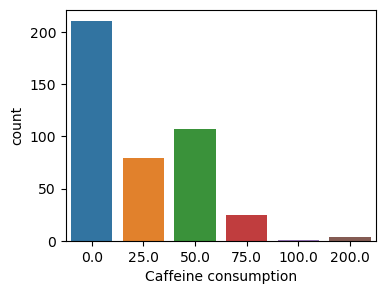

In [26]:
plt.figure(figsize=(4, 3))
sns.countplot(data=Sleep_Efficiency, x='Caffeine consumption')
plt.show()

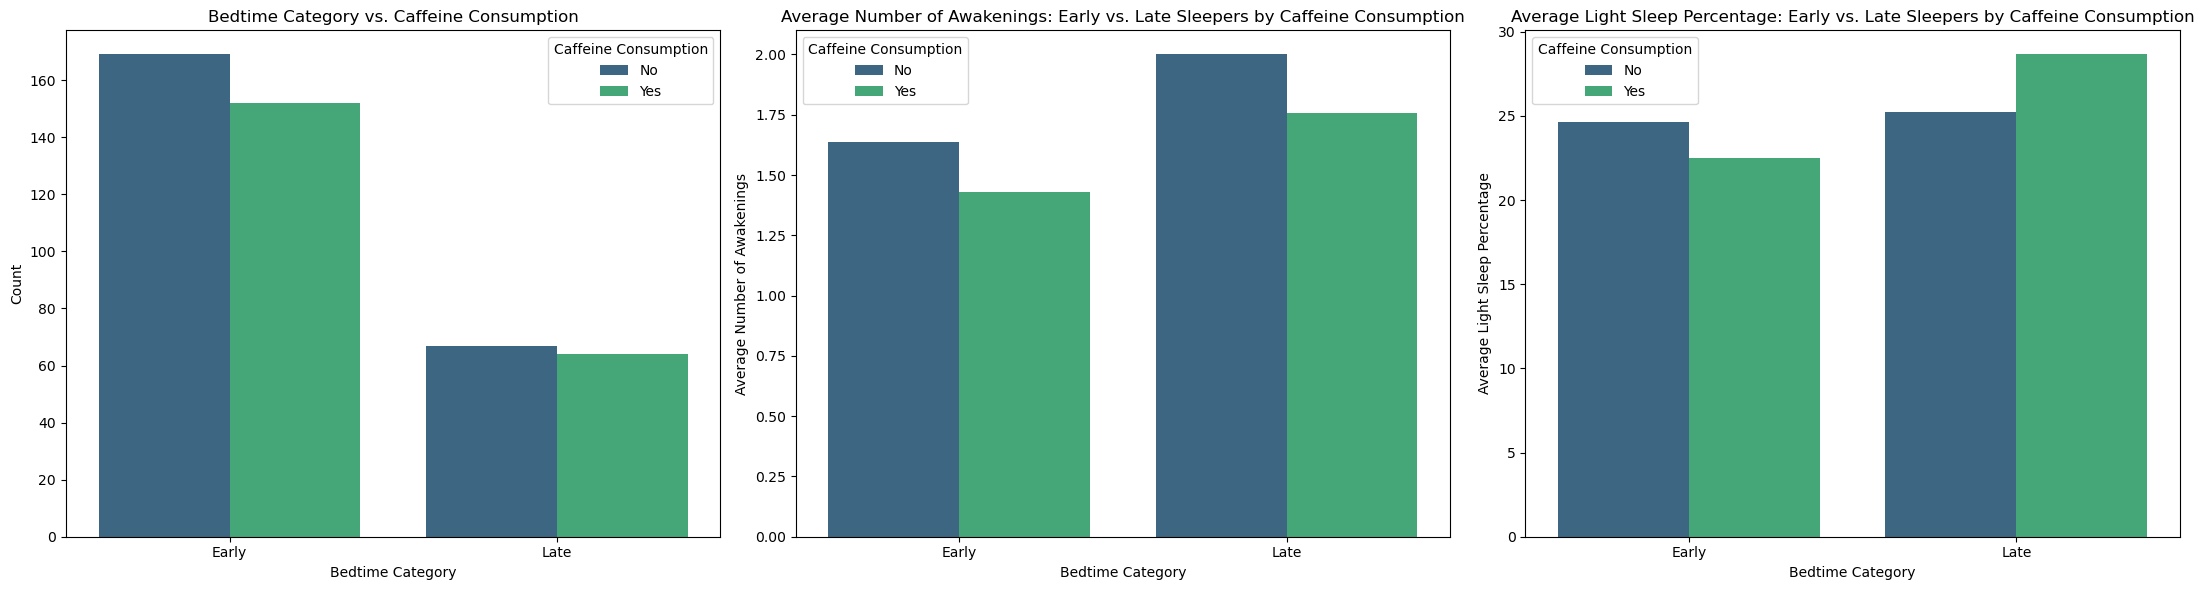

In [27]:
category_order = ['Early', 'Late']

average_awakening = Sleep_Efficiency.groupby(['Bedtime Category', 'Caffeine consumption (Yes/No)'])['Awakenings'].mean().reset_index()
average_light_sleep = Sleep_Efficiency.groupby(['Bedtime Category', 'Caffeine consumption (Yes/No)'])['Light sleep percentage'].mean().reset_index()

fig, axes = plt.subplots(1, 3, figsize=(22, 6))

sns.countplot(data=Sleep_Efficiency, x='Bedtime Category', hue='Caffeine consumption (Yes/No)', palette="viridis", order=category_order, ax=axes[0])
axes[0].set_title('Bedtime Category vs. Caffeine Consumption')
axes[0].set_xlabel('Bedtime Category')
axes[0].set_ylabel('Count')
axes[0].legend(title='Caffeine Consumption')

sns.barplot(data=average_awakening, x='Bedtime Category', y='Awakenings', hue='Caffeine consumption (Yes/No)', palette="viridis", ax=axes[1])
axes[1].set_title('Average Number of Awakenings: Early vs. Late Sleepers by Caffeine Consumption')
axes[1].set_xlabel('Bedtime Category')
axes[1].set_ylabel('Average Number of Awakenings')
axes[1].legend(title='Caffeine Consumption')

sns.barplot(data=average_light_sleep, x='Bedtime Category', y='Light sleep percentage', hue='Caffeine consumption (Yes/No)', palette="viridis", ax=axes[2])
axes[2].set_title('Average Light Sleep Percentage: Early vs. Late Sleepers by Caffeine Consumption')
axes[2].set_xlabel('Bedtime Category')
axes[2].set_ylabel('Average Light Sleep Percentage')
axes[2].legend(title='Caffeine Consumption')

plt.tight_layout()
plt.show()

While the initial analysis suggests that caffeine consumption might not significantly affect sleep quality in terms of awakenings and light sleep percentage, it’s crucial to consider individual differences and that individuals may have developed a tolerance to caffeine, which reduces its impact on their sleep patterns.
Regular caffeine consumers might not experience significant differences in sleep quality.


"It’s also important not to go to bed too late at night. The reason going to bed before midnight is better for deep sleep"
We learned that going o bed on the early side is important for your "deep sleep" stage. 

Here we will compare the early bedtime VS the later bedtime and see the differencs in there deep sleep.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


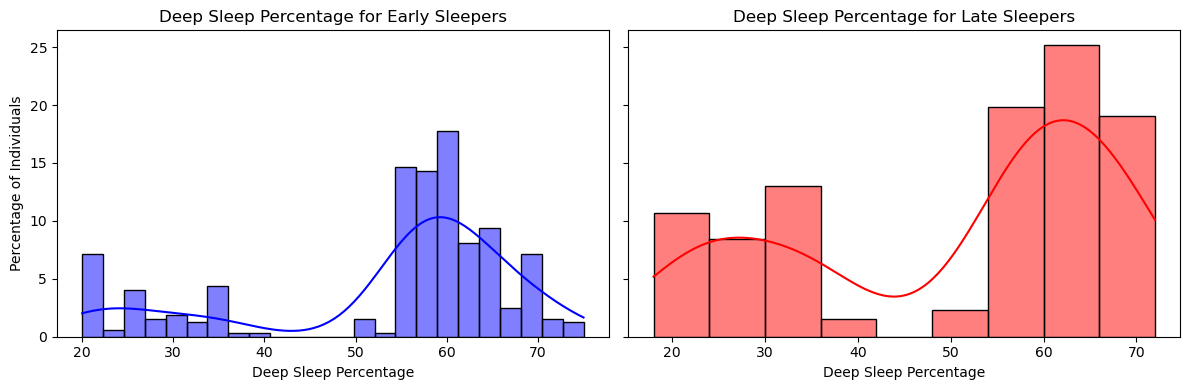

In [28]:
early_sleepers = Sleep_Efficiency[Sleep_Efficiency['Bedtime Category'] == 'Early']
late_sleepers = Sleep_Efficiency[Sleep_Efficiency['Bedtime Category'] == 'Late']

fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharey=True)
sns.histplot(data=early_sleepers, x='Deep sleep percentage', kde=True, color='blue', stat='percent', ax=axes[0])
axes[0].set_title('Deep Sleep Percentage for Early Sleepers')
axes[0].set_xlabel('Deep Sleep Percentage')
axes[0].set_ylabel('Percentage of Individuals')

sns.histplot(data=late_sleepers, x='Deep sleep percentage', kde=True, color='red', stat='percent', ax=axes[1])
axes[1].set_title('Deep Sleep Percentage for Late Sleepers')
axes[1].set_xlabel('Deep Sleep Percentage')
plt.tight_layout()
plt.show()

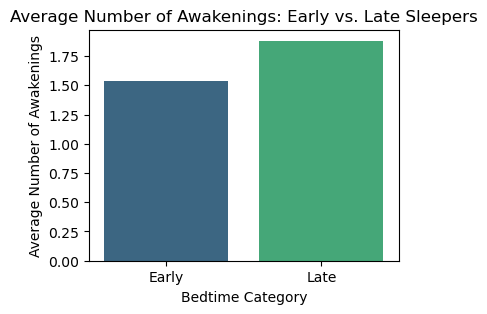

In [102]:
average_awakening = Sleep_Efficiency.groupby('Bedtime Category')['Awakenings'].mean().reset_index()
plt.figure(figsize=(4, 3))
sns.barplot(data=average_awakening, x='Bedtime Category', y='Awakenings', palette="viridis")
plt.title('Average Number of Awakenings: Early vs. Late Sleepers')
plt.xlabel('Bedtime Category')
plt.ylabel('Average Number of Awakenings')
plt.show()

#### <span> We now want to check the different hours people go to sleep and whether they consume caffeine or not.</span> 

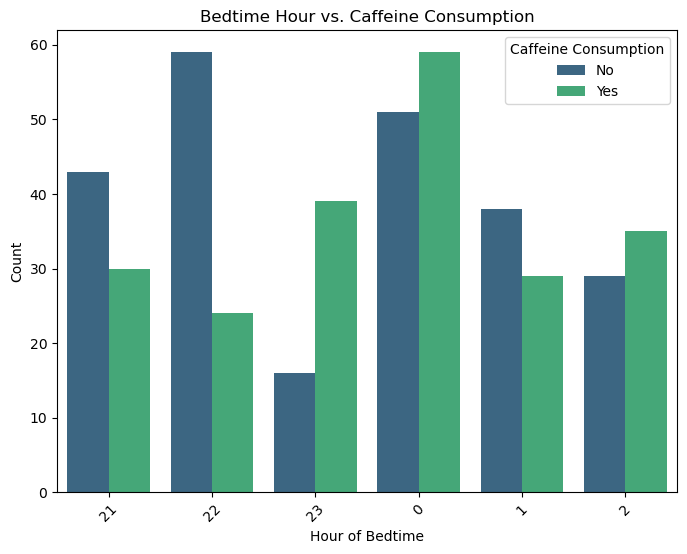

In [64]:
hour_order = [21, 22, 23, 0, 1, 2]
plt.figure(figsize=(8, 6))
sns.countplot(data=Sleep_Efficiency, x='Bedtime Hour', hue='Caffeine consumption (Yes/No)', palette="viridis", order=hour_order)
plt.title('Bedtime Hour vs. Caffeine Consumption')
plt.xlabel('Hour of Bedtime')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Caffeine Consumption')
plt.show()

### Based on our observation, we can dive deeper into the two specific groups: those who go to bed at 22:00 and those who go to bed at 00:00.
#### we can analyze their caffeine consumption.

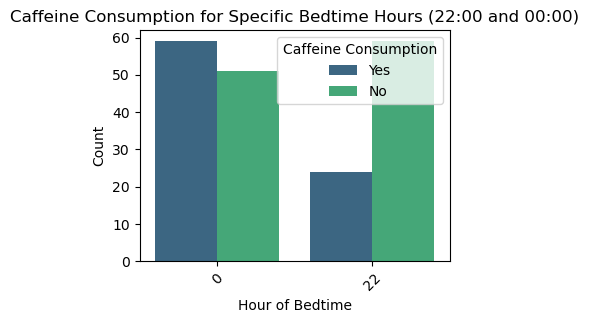

In [438]:
specific_bedtime_data = Sleep_Efficiency[Sleep_Efficiency['Bedtime Hour'].isin([22, 0])]
custom_palette = {'Yes': 'green', 'No': 'blue'}
plt.figure(figsize=(4, 3))
sns.countplot(data=specific_bedtime_data, x='Bedtime Hour', hue='Caffeine consumption (Yes/No)', palette="viridis")
plt.title('Caffeine Consumption for Specific Bedtime Hours (22:00 and 00:00)')
plt.xlabel('Hour of Bedtime')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Caffeine Consumption')
plt.show()

Now we can see the differences in both bedtimes. 22:00 would be called an 'earlier' bedtime, unlike 00:00 which can be called a 'later' bedtime. The majority of people going to bed at 22:00 do not consume caffeine, compared to those who go to bed later at 00:00 who do consume caffeine.

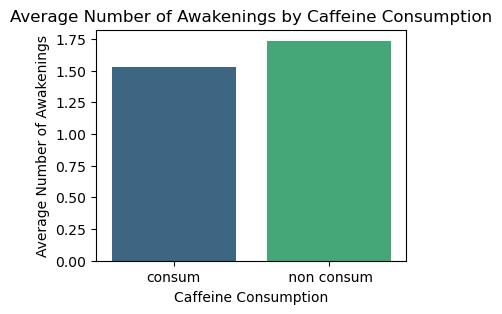

In [371]:
Sleep_Efficiency = pd.DataFrame({'Caffeine Consumption': ['consum', ' non consum'], 'Awakenings': [consum['Awakenings'].mean(), caffeine_non_consumers['Awakenings'].mean()]})
plt.figure(figsize=(4, 3))
sns.barplot(x='Caffeine Consumption', y='Awakenings', data=Sleep_Efficiency, palette='viridis')
plt.title('Average Number of Awakenings by Caffeine Consumption')
plt.xlabel('Caffeine Consumption')
plt.ylabel('Average Number of Awakenings')
plt.show()

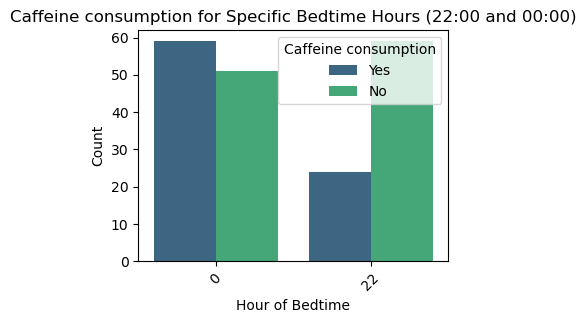

Bedtime Hour: 22, Caffeine Consumption: Yes, Average Awakenings: 1.09
Bedtime Hour: 22, Caffeine Consumption: No, Average Awakenings: 1.47
Bedtime Hour: 0, Caffeine Consumption: Yes, Average Awakenings: 1.53
Bedtime Hour: 0, Caffeine Consumption: No, Average Awakenings: 1.78


In [259]:
plt.figure(figsize=(4, 3))
sns.countplot(data=specific_bedtime_data, x='Bedtime Hour', hue='Caffeine consumption (Yes/No)', palette="viridis")
plt.title('Caffeine consumption for Specific Bedtime Hours (22:00 and 00:00)')
plt.xlabel('Hour of Bedtime')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Caffeine consumption')
plt.show()

for hour in [22, 0]:
    for consumption in ['Yes', 'No']:
        group = specific_bedtime_data[(specific_bedtime_data['Bedtime Hour'] == hour) & (specific_bedtime_data['Caffeine consumption (Yes/No)'] == consumption)]
        avg_awakenings = group['Awakenings'].mean()
        print(f"Bedtime Hour: {hour}, Caffeine Consumption: {consumption}, Average Awakenings: {avg_awakenings:.2f}")


### <span style="color:red"> Observation 3:</span>